In [2]:
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
yeast= networkx.read_edgelist('/Users/seanflanary/desktop/Yeast_transcription.txt',create_using=networkx.DiGraph(),nodetype= str, data = [('weight',float)])

In [4]:
graph= networkx.generators.gnm_random_graph(150,1500)

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


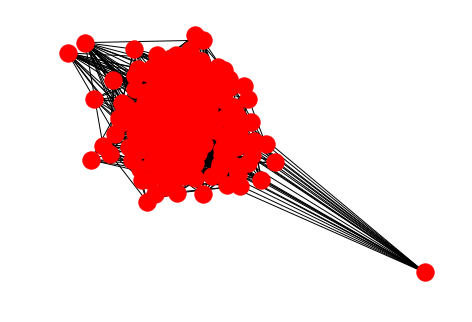

In [5]:
networkx.draw(graph)
plt.show()

In [6]:
networkx.average_clustering(graph)

0.13766530110614528

In [7]:
graph2= networkx.generators.gnm_random_graph(150,1500)
networkx.average_clustering(graph2)

0.13382767623187827

In [8]:
total = 0
runs = 1000
for i in range(runs):
    graphx = networkx.generators.gnm_random_graph(150,1500)
    total+=networkx.average_clustering(graphx)
print(total/runs)

0.134118147168298


In [9]:
word_assoc= networkx.read_edgelist('/Users/seanflanary/desktop/word_association_graph_DSF.txt',create_using=networkx.DiGraph(),nodetype= str, data = [('weight',float)])

In [10]:
words_of_length = {} # keys: words, value: num. of occurence
for node in word_assoc.nodes():
    length = len(node)
    if length in words_of_length:
        words_of_length[length] += 1
    else:
         words_of_length[length] = 1

In [15]:
print (words_of_length)

{1: 13, 8: 1273, 2: 45, 3: 447, 5: 1679, 6: 1841, 4: 1349, 10: 601, 12: 202, 9: 955, 7: 1665, 11: 378, 13: 83, 15: 19, 14: 45, 16: 11, 17: 7, 19: 2, 18: 1}


ValueError: x must be 1D or 2D

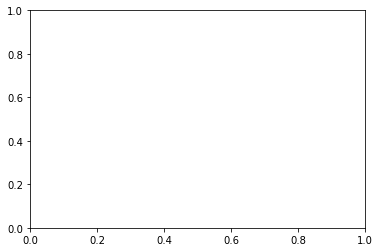

In [26]:
plt.hist(words_of_length.values())

In [24]:
in_degrees = {} # keys: words, value: num. of occurence
for source, target in word_assoc.edges():
    if target in in_degrees:
        in_degrees[target] += 1
    else:
        in_degrees[target] = 1

In [18]:
print(in_degrees)

{'ALPHABET': 6, 'AN': 1, 'AND': 1, 'APPLE': 47, 'B': 2, 'GRADE': 35, 'GREAT': 50, 'LETTER': 47, 'ONE': 63, 'PLUS': 9, 'THE': 5, 'WORD': 51, 'Z': 1, 'A': 7, 'ABC': 2, 'CEREAL': 21, 'ENGLISH': 43, 'KINDERGARTEN': 2, 'LETTERS': 10, 'NUMBERS': 19, 'SCHOOL': 183, 'SOUP': 34, 'SPELL': 17, 'TWENTY_SIX': 1, 'BANANA': 13, 'BITE': 37, 'COMPUTER': 39, 'CORE': 3, 'CRISP': 9, 'EAT': 126, 'FOOD': 324, 'FRUIT': 52, 'GREEN': 126, 'ORANGE': 39, 'PEACH': 10, 'PEAR': 6, 'PIE': 36, 'RED': 135, 'SEED': 10, 'TREE': 106, 'WORM': 17, 'ANXIETY': 12, 'AVERAGE': 20, 'CLASS': 95, 'CLASSIFICATION': 1, 'GOOD': 255, 'LEVEL': 13, 'MARK': 23, 'PASS': 19, 'SCORE': 10, 'TEST': 71, 'WORK': 196, 'AWESOME': 13, 'AWFUL': 13, 'BAD': 229, 'BEST': 31, 'BIG': 120, 'GREATER': 3, 'HUGE': 20, 'LARGE': 54, 'LITTLE': 46, 'MAGNIFICENT': 2, 'MAN': 171, 'POOR': 51, 'SMALL': 117, 'SUPER': 7, 'TERRIBLE': 9, 'TERRIFIC': 6, 'WONDERFUL': 14, 'ENVELOPE': 8, 'FRIEND': 114, 'HEAD': 77, 'HOME': 97, 'MAIL': 20, 'MAILBOX': 2, 'NEWS': 32, 'NOTE': 

In [19]:
av_degree = {} # keys: words, value: num. of occurence
for obj in in_degrees.keys():
    if len(obj) in av_degree:
        av_degree[len(obj)] += in_degrees[obj]
    else:
        av_degree[len(obj)] = in_degrees[obj]

print (av_degree)

{8: 4835, 2: 555, 3: 7546, 5: 16495, 1: 27, 6: 10814, 4: 18542, 7: 7280, 12: 380, 10: 1660, 14: 79, 11: 840, 9: 2916, 13: 156, 16: 14, 15: 22, 17: 7, 18: 1, 19: 2}


In [20]:
total_avs = {}
for num in words_of_length:
    total_avs[num] = av_degree[num]/words_of_length[num]

In [21]:
print(total_avs)

{1: 2.076923076923077, 8: 3.798114689709348, 2: 12.333333333333334, 3: 16.88143176733781, 5: 9.824300178677785, 6: 5.8739815317762085, 4: 13.744996293550779, 10: 2.762063227953411, 12: 1.881188118811881, 9: 3.0534031413612563, 7: 4.372372372372372, 11: 2.2222222222222223, 13: 1.8795180722891567, 15: 1.1578947368421053, 14: 1.7555555555555555, 16: 1.2727272727272727, 17: 1.0, 19: 1.0, 18: 1.0}


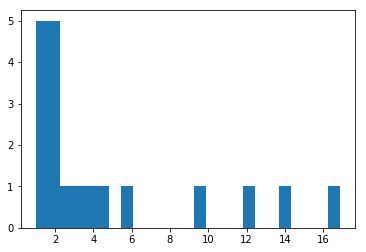

In [25]:
_ = plt.hist(list(total_avs.values()), bins=25)

the graph looks this